In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hr=pd.read_csv("C:/Users/hp/Downloads/HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#lets find out if there are missing values or not?
hr.isnull().sum()
#no missing values.The data is clean

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
# finding how many employee have left the company as per the dataset
hr_left=pd.DataFrame(hr['left'].value_counts())
hr_left

,left
0,11428
1,3571


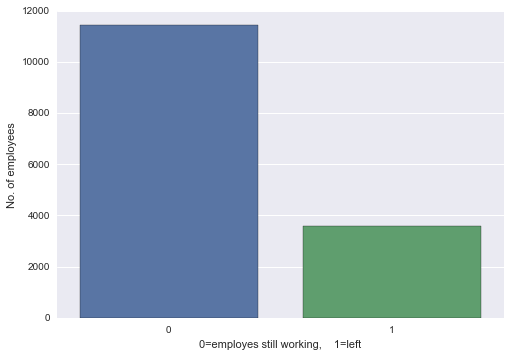

In [7]:
sns.barplot(hr_left.index,hr_left['left'])
plt.xlabel('0=employes still working,    1=left')
plt.ylabel('No. of employees')
plt.show()

In [8]:
#finding in terms of percentage
hr_left['left']=hr_left['left'].apply(lambda x: x/hr_left['left'].sum())
hr_left

,left
0,0.761917
1,0.238083


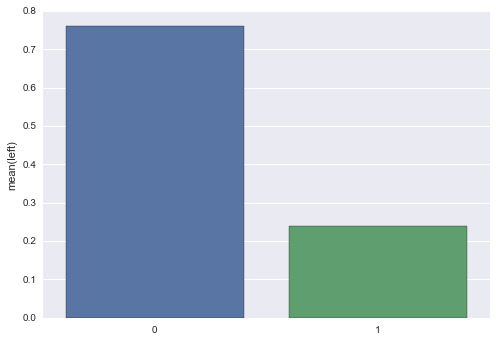

In [9]:
sns.barplot(hr_left.index,hr_left['left'])

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


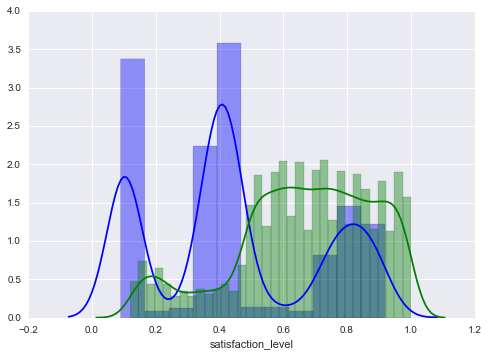

In [10]:
hr_satisfaction=hr[['satisfaction_level','left']]
hr_satisfaction_left=hr_satisfaction[(hr_satisfaction['left']==1)]
hr_satisfaction_stayed=hr_satisfaction[(hr_satisfaction['left']==0)]
sns.distplot(hr_satisfaction[(hr_satisfaction['left']==1)]['satisfaction_level'],color='b')
sns.distplot(hr_satisfaction[(hr_satisfaction['left']==0)]['satisfaction_level'],color='g')
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


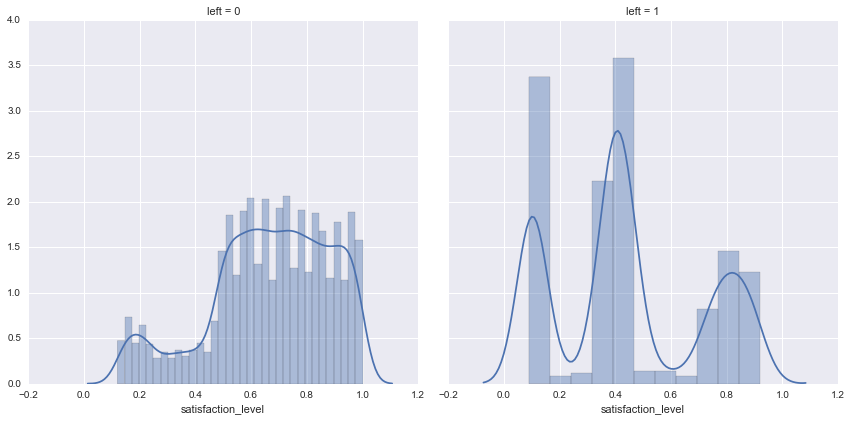

In [11]:
g=sns.FacetGrid(hr,col='left',size=6)
g.map(sns.distplot,'satisfaction_level')

In [12]:
#large number of people who had lower satisfaction levels, have left the company
#Especially, people who have satisfaction level less than 0.5
#But there is also a surge in at higher level of satisfaction.

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


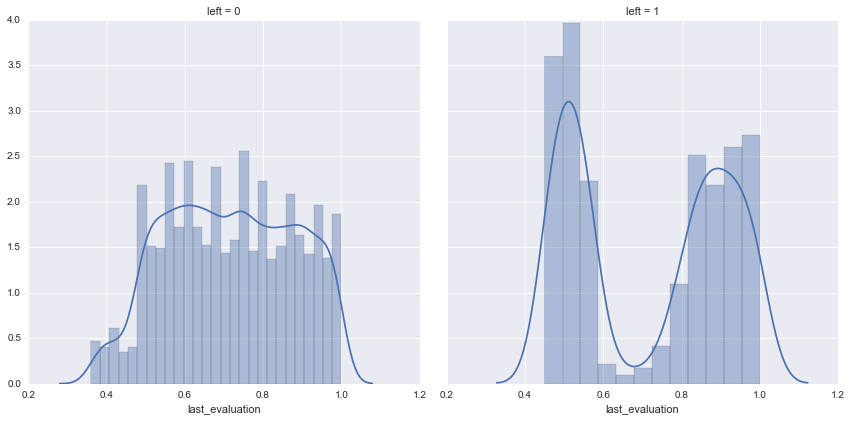

In [13]:
g=sns.FacetGrid(hr,col='left',size=6)
g.map(sns.distplot,'last_evaluation')
plt.show()
#People with low evaluation and very high evaluation are leaving,
#where as people with average evaluation scores are staying back. That seems interesting.

In [14]:
#People with low evaluation and very high evaluation are leaving, 
#where as people with average evaluation scores are staying back.

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


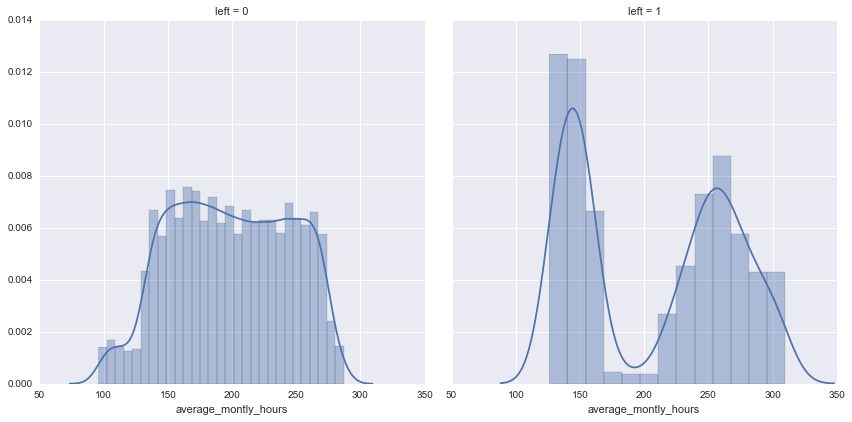

In [15]:
g=sns.FacetGrid(hr,col='left',size=6)
g.map(sns.distplot,'average_montly_hours')

In [16]:
 # with an avg monthly hours of 200, very low employees are leaving

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


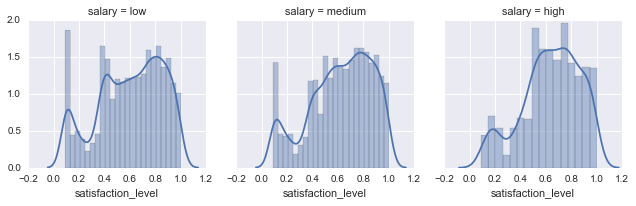

In [17]:
#how is satisfaction level related to average_monthly_hours
g=sns.FacetGrid(hr,col='salary')
g.map(sns.distplot,'satisfaction_level')

In [18]:
# how many employee who had work accident left the company?

work_accident_count=hr[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size()
work_accident_percent=work_accident_count.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()
work_accident_percent.columns=['Work_accident', 'left', 'percent']
work_accident_percent

,Work_accident,left,percent
0,0,0,0.734840
1,0,1,0.265160
2,1,0,0.922084
3,1,1,0.077916


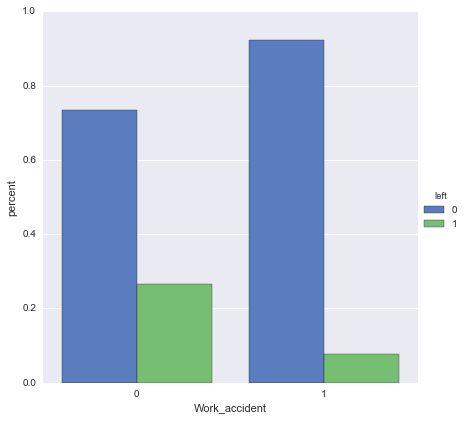

In [19]:
sns.factorplot(x="Work_accident", y = 'percent', hue="left", data=work_accident_percent,size=6, kind="bar",palette='muted')

In [20]:
#so just by looking on work accident we can't really predict whether an employee will leave or not

In [21]:
time_spend_company=hr[['time_spend_company','left']].groupby(['time_spend_company','left']).size()
#time_spend_company.columns=['time_spend_company','left','count']
time_spend_company=time_spend_company.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()
time_spend_company.columns=['time_spend_company','left','percent']
time_spend_company

,time_spend_company,left,percent
0,2,0,0.983662
1,2,1,0.016338
2,3,0,0.753841
3,3,1,0.246159
4,4,0,0.651936
5,4,1,0.348064
6,5,0,0.434487
7,5,1,0.565513
8,6,0,0.708914
9,6,1,0.291086


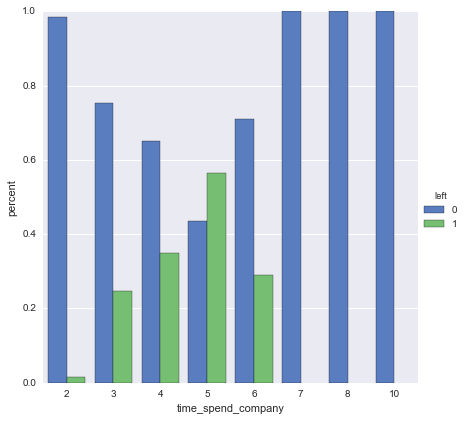

In [22]:
sns.factorplot('time_spend_company','percent','left',data=time_spend_company,kind='bar',size=6,palette='muted')
#after gaining initial experience employee tend to leave,and with higher experience of 5 years that rate seems to be the highest
#one intresting result that comes out is employee who

In [23]:
#People who have spent 2 years are not leaving the company. But as experience,people tend to look for better opportunity and highest after they spend 5 years in the company. 
#But once they cross the golden years '7', they are not leaving.

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


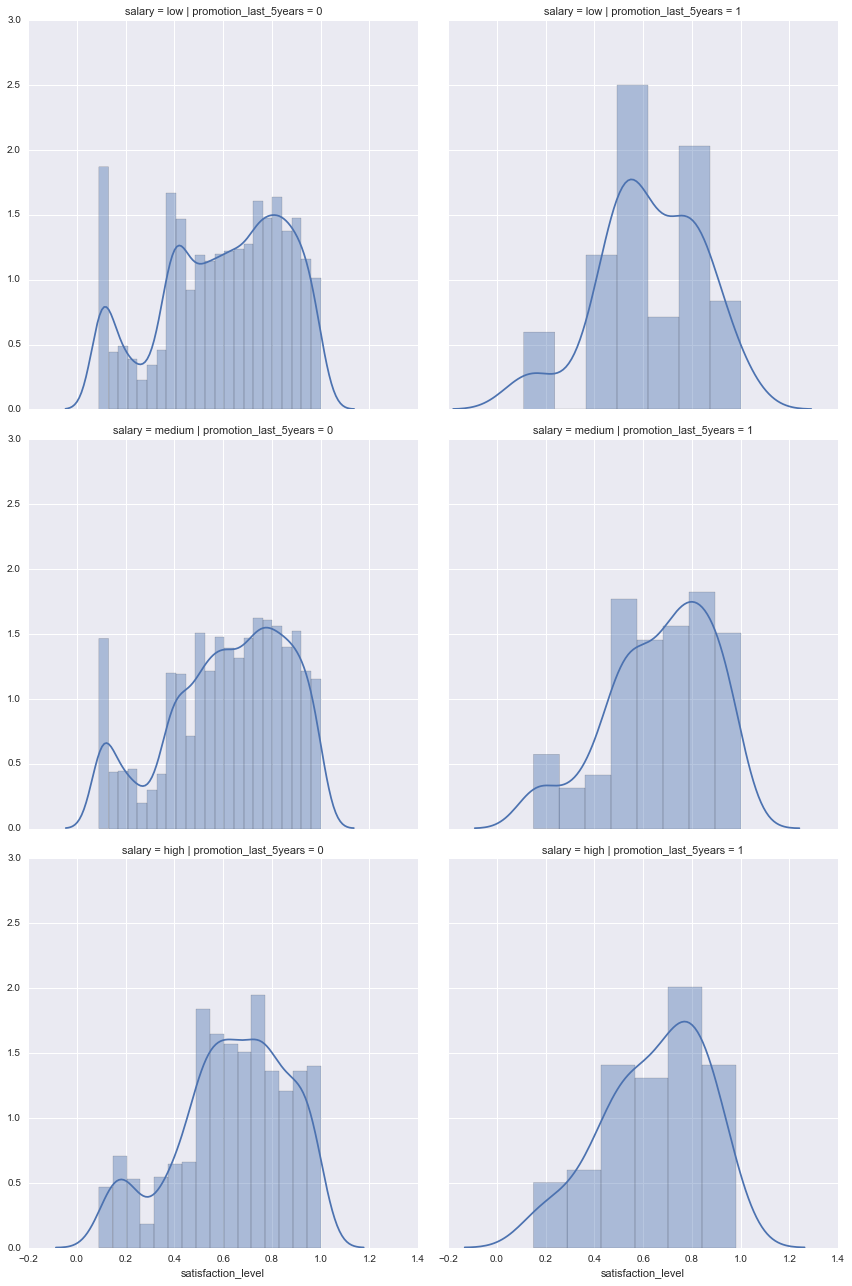

In [24]:
# how promotion and satisfaction level are associated
g=sns.FacetGrid(hr,col='promotion_last_5years',row='salary',size=6)
g.map(sns.distplot,'satisfaction_level')

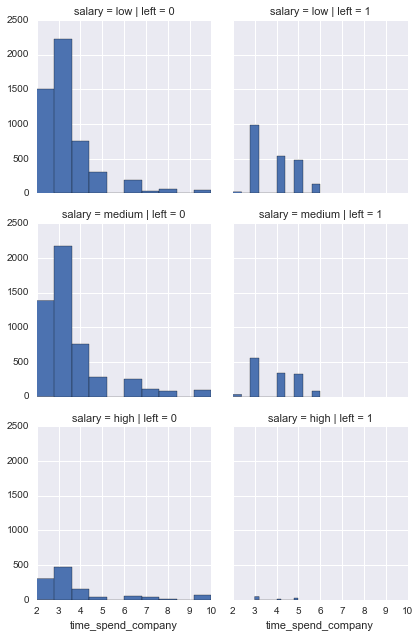

In [25]:
g=sns.FacetGrid(hr,col='left',row='salary')
g.map(plt.hist,'time_spend_company')

In [26]:
#sales on left
hr_sales=hr[['sales','left']].groupby(['sales','left']).size().reset_index()
hr_sales.columns=['sales','left','count']
hr_sales

,sales,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


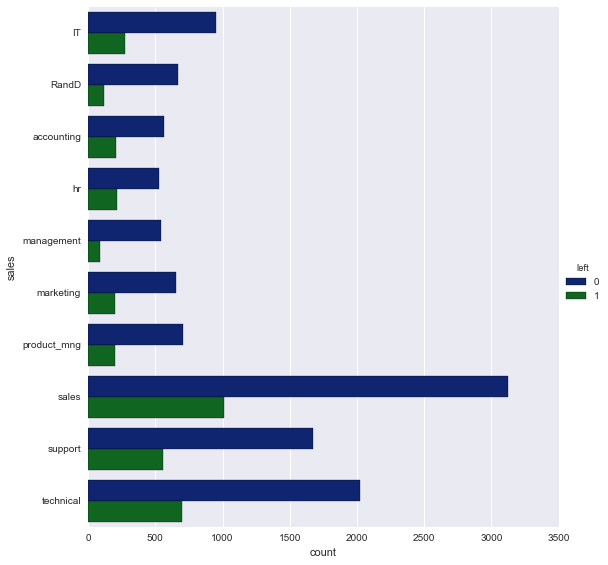

In [27]:
sns.factorplot(x='count',y='sales',hue='left',data=hr_sales,kind='bar',size=8,palette='dark')

In [28]:
hr_sales = hr[['sales', 'left']].groupby(['sales', 'left']).size()
hr_sales_percent = hr_sales.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
hr_sales_percent.columns=['sales', 'left','percent']
hr_sales_percent

,sales,left,percent
0,IT,0,0.777506
1,IT,1,0.222494
2,RandD,0,0.846252
3,RandD,1,0.153748
4,accounting,0,0.734029
5,accounting,1,0.265971
6,hr,0,0.709066
7,hr,1,0.290934
8,management,0,0.855556
9,management,1,0.144444


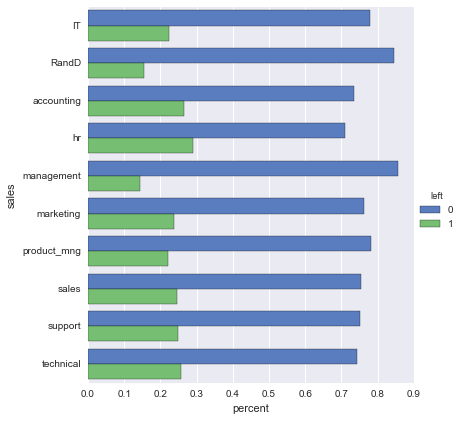

In [29]:
sns.factorplot(x='percent',y='sales',hue='left',data=hr_sales_percent,palette='muted',size=6,kind='bar')

In [30]:
#how salaries accross department are related to employees leaving the company
hr_salaries=hr[['sales','salary']].groupby(['sales','salary']).size().reset_index()
hr_salaries.columns=['sales','salary','count']
hr_salaries

,sales,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


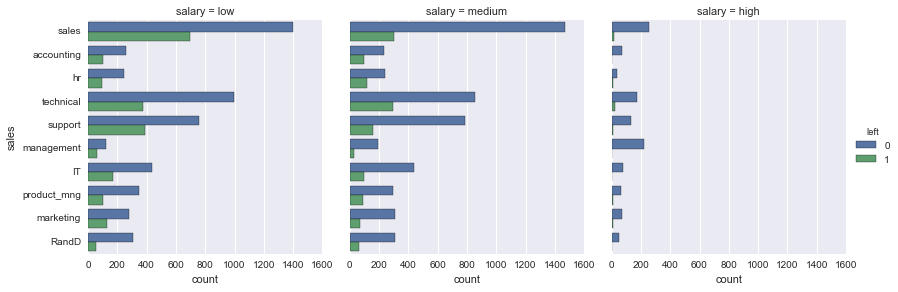

In [31]:
sns.factorplot(y='sales',col='salary',hue='left',data=hr,kind='count')

In [32]:
hr_projects=hr[['number_project','left']].groupby(['number_project','left']).size()
hr_projects=hr_projects.groupby(level=[0]).apply(lambda x: x/ x.sum()).reset_index()
hr_projects.columns=['number_project','left','percent']
hr_projects

,number_project,left,percent
0,2,0,0.343802
1,2,1,0.656198
2,3,0,0.982244
3,3,1,0.017756
4,4,0,0.906300
5,4,1,0.093700
6,5,0,0.778341
7,5,1,0.221659
8,6,0,0.442078
9,6,1,0.557922


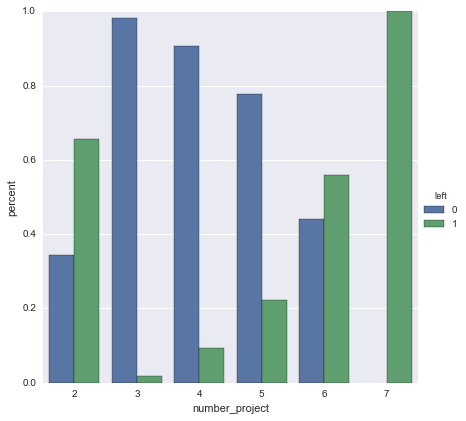

In [33]:
sns.factorplot(y='percent',x='number_project',hue='left',data=hr_projects,kind='bar',size=6)

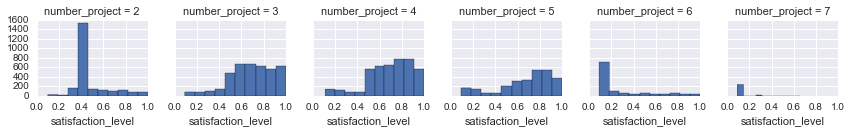

In [34]:
#finding relation between number of projects  and satisfaction level
g=sns.FacetGrid(hr,col='number_project',size=2)
g.map(plt.hist,'satisfaction_level')

In [35]:
#with project no == 3,4,5 there seems to be a good satisfaction level 
#with increase in projects==6,7 satisfaction_level becomes low

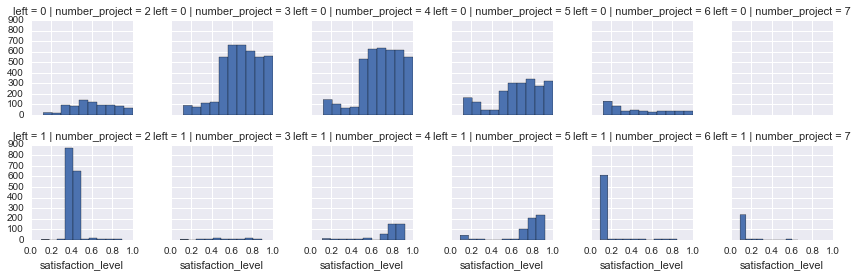

In [36]:
g=sns.FacetGrid(hr,col='number_project',row='left',size=2)
g.map(plt.hist,'satisfaction_level')

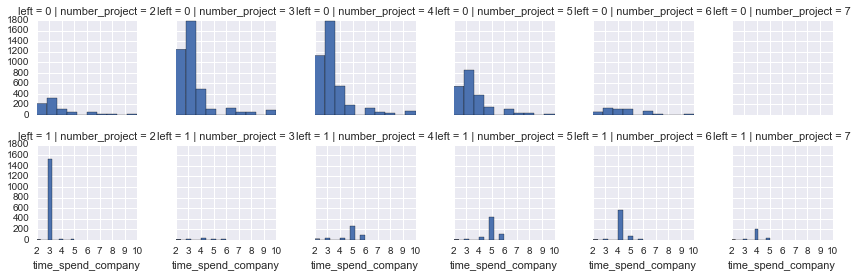

In [37]:
g=sns.FacetGrid(hr,col='number_project',row='left',size=2)
g.map(plt.hist,'time_spend_company')

In [38]:
#people leave after 2 years as they might be looking for othr opportunity
# do not overburdern your valuable employee by giving him 6,7 projects .He'll most likely leave

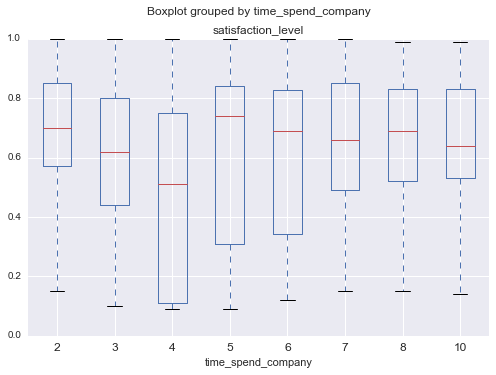

In [39]:
hr.boxplot('satisfaction_level',by='time_spend_company')

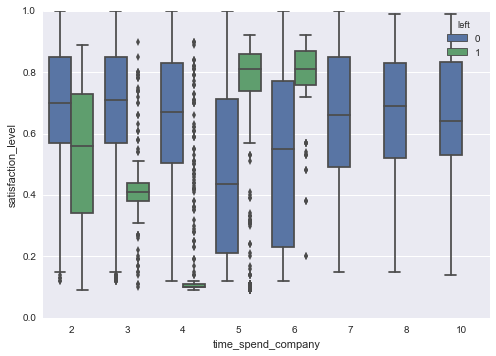

In [40]:
sns.boxplot(x='time_spend_company',y='satisfaction_level',hue='left',data=hr)

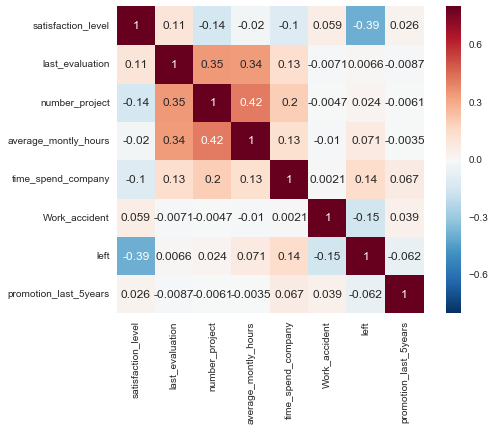

In [41]:
corrmat = hr.corr()
#f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat,vmax=0.8 ,square=True, annot=True)
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
variables=['salary','sales']
for var in variables:
    hr[var]=le.fit_transform(hr[var])



In [44]:
kf = KFold(len(hr), 6, shuffle=True, random_state=8)
lr =RandomForestClassifier()
accuracies = cross_val_score(lr,hr[['satisfaction_level','number_project','time_spend_company','Work_accident','salary','sales']], hr["left"], scoring="accuracy", cv=kf)
accuracies.mean()

0.97593149259703882

In [45]:
lr.fit(hr[['satisfaction_level','number_project','time_spend_company','Work_accident']],hr[['left']])
predicted_value=lr.predict(hr[['satisfaction_level','number_project','time_spend_company','Work_accident']])
prob=lr.predict_proba(hr[['satisfaction_level','number_project','time_spend_company','Work_accident']])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [46]:
hr['predicted_value']=predicted_value
hr[['left','predicted_value']].head(10)

,left,predicted_value
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [47]:
from sklearn import metrics
cm = metrics.confusion_matrix( hr['left'],hr['predicted_value'], [1,0] )
cm

array([[ 3422,   149],
       [  169, 11259]])

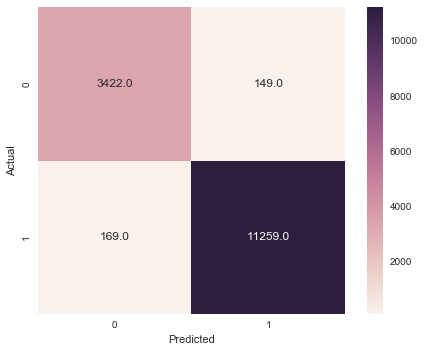

In [50]:
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [51]:
True_positive=11259
True_negative=3422
False_positive=149
False_negative=169

In [53]:
sensitivity=True_positive/(True_positive+False_negative)
sensitivity

0.9852117605880294

In [54]:
specificity=True_negative/(True_negative+False_positive)
specificity

0.9582749929991599

In [49]:
#our model is a good fit

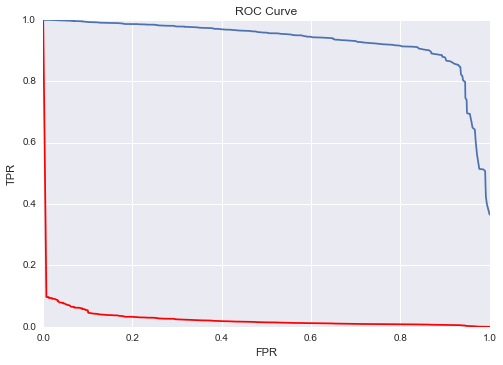

In [53]:
fpr,tpr,threshold=metrics.roc_curve(hr['left'],prob[:,1])
plt.plot(threshold,fpr,c='r')
plt.plot(threshold,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
#It is a plot of the true positive rate against the false positive rate for the different possible thresholds of a diagnostic test.

In [ ]:
#seems to be the best case senario


In [50]:
auc_score = metrics.roc_auc_score(hr["left"], prob[:,1])
auc_score

0.99692409011377481

In [ ]:
#when auc tends to 1 it means we are nearing a perfect classifier